# Bootstrap

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


In [2]:
np.random.seed(0)

In [3]:
"""
# Detalles de visualización
plt.rcParams["font.size"] = 16
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False
"""

'\n# Detalles de visualización\nplt.rcParams["font.size"] = 16\nplt.rcParams["axes.spines.top"] = False\nplt.rcParams["axes.spines.right"] = False\nplt.rcParams["axes.spines.left"] = False\n'

In [4]:
# Generación de datos aleatorios sesgados
def datos_sesgados(sesgo, cantidad, maximo):
    aleatorios = stats.skewnorm.rvs(sesgo, 
                                    size = cantidad,
                                    random_state = 0)
    aleatorios += abs(aleatorios.min())
    aleatorios = np.round(aleatorios, 2)/aleatorios.max() * maximo
    return np.round(aleatorios, 1)

In [5]:
calif = datos_sesgados(-25.0, 100_000, 10.0)
calif

array([6.2, 9.1, 7.8, ..., 8.3, 7.5, 7.2])

Text(0, 0.5, 'Frecuencia\n')

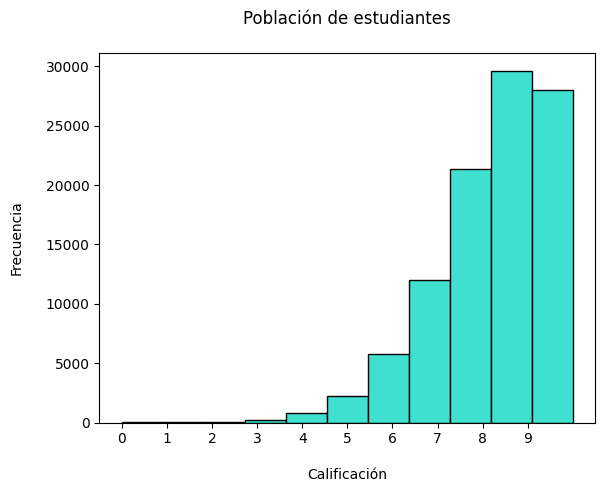

In [7]:
plt.hist(calif, bins = 11, color = 'turquoise', edgecolor = 'black')
plt.title('Población de estudiantes\n')
plt.xticks(range(0,10))
plt.xlabel('\nCalificación')
plt.ylabel('Frecuencia\n')

In [8]:
# muestra correspondiente al 0.1% de la problación
tamanio_muestra = 100
muestra_principal = np.random.choice(calif, tamanio_muestra)
muestra_principal

array([9.6, 8.8, 9.4, 9.2, 7.3, 9.4, 8.8, 6.8, 9.2, 7. , 8. , 9.8, 6.4,
       9.3, 6.4, 8.2, 9.6, 8.2, 6.4, 5.1, 9. , 9.7, 8.8, 6.8, 9.4, 7.9,
       6.6, 9.2, 8.4, 9.3, 4.6, 8.6, 7.3, 9.7, 9.5, 7.1, 7.6, 5.8, 6.6,
       5.5, 8.7, 7. , 6.3, 9.9, 6.4, 9.6, 7.1, 6.5, 9.7, 5.3, 8.7, 6.8,
       8. , 6.5, 9.3, 8.9, 8.1, 7.5, 7.3, 7.4, 8.6, 7.5, 8.2, 8.8, 9.5,
       7.5, 3.3, 7. , 8.4, 9.2, 9.7, 9. , 7.8, 6.9, 7.2, 7.8, 9.3, 5.3,
       7.3, 7.7, 7.2, 6.6, 8.6, 6.6, 5.4, 8.5, 7.6, 7. , 7.8, 7. , 9. ,
       8.4, 8.3, 8.7, 8.1, 8.5, 9.4, 8.6, 6.6, 9.5])

In [21]:
muestras = np.array([])
num_muestras = 1000
#for m in range(num_muestras):
#    muestras = np.append(muestras, 
#                        np.random.choice(calif, tamanio_muestra, replace = True))

In [39]:
muestras = np.array(
    [np.array(
        np.random.choice(calif, tamanio_muestra, replace = True)
        )
        for _ in range(num_muestras)]
        )
muestras

array([[8.1, 2.3, 9.2, ..., 9.8, 8. , 7.5],
       [8.9, 9.2, 8.9, ..., 7.8, 9.3, 8.6],
       [9.6, 9.7, 8.5, ..., 5.8, 7.3, 9.5],
       ...,
       [9.7, 9.2, 9.2, ..., 7.5, 8.9, 9.6],
       [8. , 9. , 9. , ..., 8.6, 9.5, 7. ],
       [8.9, 8.8, 9.7, ..., 7.1, 9.4, 9.1]])

In [40]:
np.shape(muestras)

(1000, 100)

Distribución muestral de la media de las muestras

In [43]:
np.shape(muestras.mean(axis = 1))

(1000,)

Text(0, 0.5, 'Frecuencia\n')

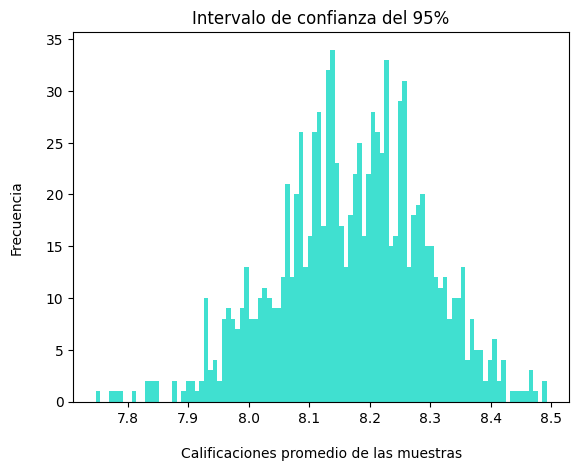

In [58]:
plt.hist(muestras.mean(axis = 1), bins = 100, color = 'turquoise')
plt.title('Intervalo de confianza del 95%')
plt.xlabel('\nCalificaciones promedio de las muestras')
plt.ylabel('Frecuencia\n')

Calculo del intervalo de confianza utilizando cuantiles

In [47]:
# Cuantil 97.5 - Cuantil 2.5 = Intervalo de confianza del 95%
intervalo_confianza = np.quantile(muestras.mean(axis=1), [0.025, 0.975]) 
intervalo_confianza

array([7.929925, 8.397025])

In [50]:
lim_inf, lim_sup = intervalo_confianza[0], intervalo_confianza[1]
media = calif.mean()

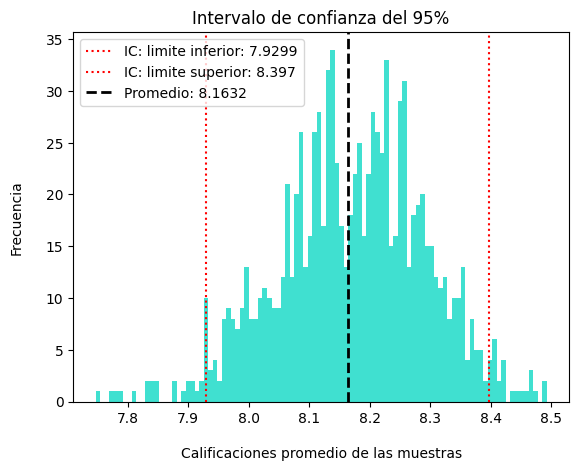

In [61]:
plt.hist(muestras.mean(axis = 1), bins = 100, color = 'turquoise')
plt.axvline(lim_inf, label = f"IC: limite inferior: {np.round(lim_inf, 4)}", color = "red", linestyle = ":")
plt.axvline(lim_sup, label = f"IC: limite superior: {np.round(lim_sup, 4)}", color = "red", linestyle = ":")
plt.axvline(media, label = f"Promedio: {np.round(media, 4)}", color = "black", linestyle = "--", linewidth = 2)
plt.title('Intervalo de confianza del 95%')
plt.xlabel('\nCalificaciones promedio de las muestras')
plt.ylabel('Frecuencia\n')
plt.legend()

In [66]:
U = media - lim_inf
U

0.2333179999999997